# Introduction

The purpose of this project is to showcase data visualization techniques via Matplotlib module in Python. Within this project, we will be visualizing how Euro-USD exchange rates changed over the years and then highlight how it changed throughout U.S. presidencies.  

Let us first import the relevant modules of this project. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
from matplotlib import style
import warnings

# Data Cleaning 

In [4]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [5]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace= True)
# the reason for two \\ instead of one \ is because python reads it as we're trying to access files this way

In [7]:
# the form of datetime takes pd.to_datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # cannot use the inplace argument here
# because to_datetime HAS to be accesses via pandas. remember it is a function and we're changing dtype

In [8]:
exchange_rates.sort_values(by='Time', inplace = True, ascending = True) 
# to sort the values by ascending time

In [9]:
exchange_rates.reset_index(inplace=True, drop = True)
# the drop allows us to drop the extra column of index created with this function
# drop = True allows us to simply reset the index (row number labels)

In [10]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [11]:
euro_to_dollar = exchange_rates.loc[:,['Time', 'US_dollar']]

In [12]:
exchange_rates['US_dollar'].value_counts() # checking if there are any inconsistencies and mistakes in the data 

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

We notice that there are 62 ('-') dashes in the US_dollar column, let us drop them.  

In [13]:
exchange_rates = exchange_rates.loc[exchange_rates['US_dollar']!='-', :]

In [14]:
exchange_rates['US_dollar'].value_counts() # checking if the dashes are removed 

1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64

In [15]:
exchange_rates['US_dollar'] = exchange_rates['US_dollar'].astype(float) # converting it to a float number 

Now that we are finished cleaning the data, we can generate a line plot to visualize the evolution of the euro-dollar exchange rate. 

To make graphs smoother, we can use the concept of a rolling mean! This essentially calculates the average of XYZ windows (depending on thw argument) and averages the numbers every XYZ interval. 

In [16]:
rolling_dollar = exchange_rates['US_dollar'].rolling(30).mean()

# Data Visualization 

We will now be trying to produce a figure that will highlight the peak of the Euro-USD exchange rate during the 2007-2008 financial crisis. 

Let us first build a base of how the Euro-USD exchange rate looked from 2006 - 2010.

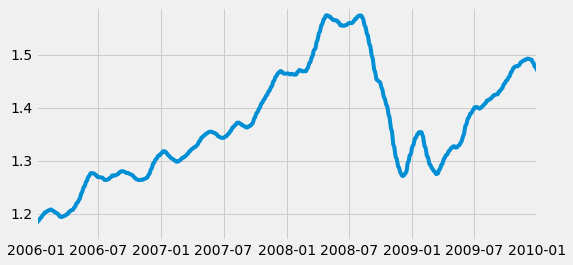

In [17]:
fig, ax = plt.subplots(figsize=(8,4)) #trial and error with the figsize
plt.style.use('fivethirtyeight')
ax.plot(exchange_rates['Time'], rolling_dollar)
plt.ylim(1.15,1.59)
ax.set_xlim([datetime.date(2006,1,1)], [datetime.date(2010,1,1)])

plt.show()

We can now employ Gestalt principles to highlight the peak in comparison with the rest of the data with additional features to make the image/time series graph more aesthetically pleasing to the eye.

C:\Users\elias\AppData\Local\Temp\ipykernel_18032\1151605164.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2006, "", 2007, "", 2008, "", 2009, "", 2010])


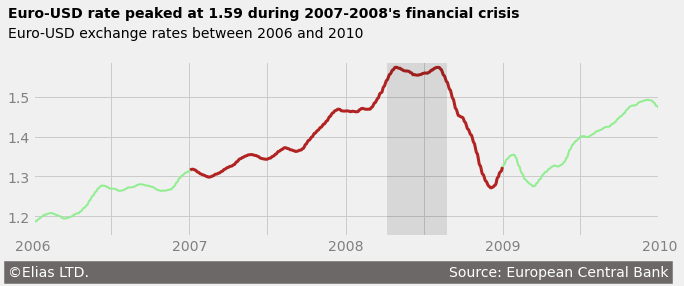

In [18]:
fig, ax = plt.subplots(figsize=(10,3)) #trial and error with the figsize
plt.style.use('fivethirtyeight')
ax.plot(exchange_rates['Time'], rolling_dollar, linewidth=2, c='lightgreen')
ax.plot(exchange_rates['Time'][2050:2560], rolling_dollar[2050:2560], linewidth=3, c='firebrick')

plt.ylim(1.15,1.59)
ax.set_xlim([datetime.date(2006,1,1)], [datetime.date(2010,1,1)] )
ax.set_xticklabels([2006, "", 2007, "", 2008, "", 2009, "", 2010])
ax.tick_params(axis='x', colors = 'grey')
ax.tick_params(axis='y', colors='grey')
ax.text(13090,1.7, 'Euro-USD rate peaked at 1.59 during 2007-2008\'s financial crisis', weight='bold')
ax.text(13090,1.65, 'Euro-USD exchange rates between 2006 and 2010')
ax.text(13090,1.05, '©Elias LTD.' + ' '*80 + 'Source: European Central Bank', backgroundcolor = '#6B6867', c = 'white')
ax.axvline(x=14045, linewidth= 60, alpha=0.1, c='black')
plt.show()
#BTW U CAN ALWAYS USE HEX OR COLOR NAME

We can now advance this graph into producing an image that highlights the change of the exchange rates under different presidencies. 
* Bush was president from 2001-2009
* Obama was president from 2009-2017
* Trump was president from 2017-2021

We shall continue to use the FiveThirtyEight style and produce three separate graphs for the three different presidents contained into one figure.

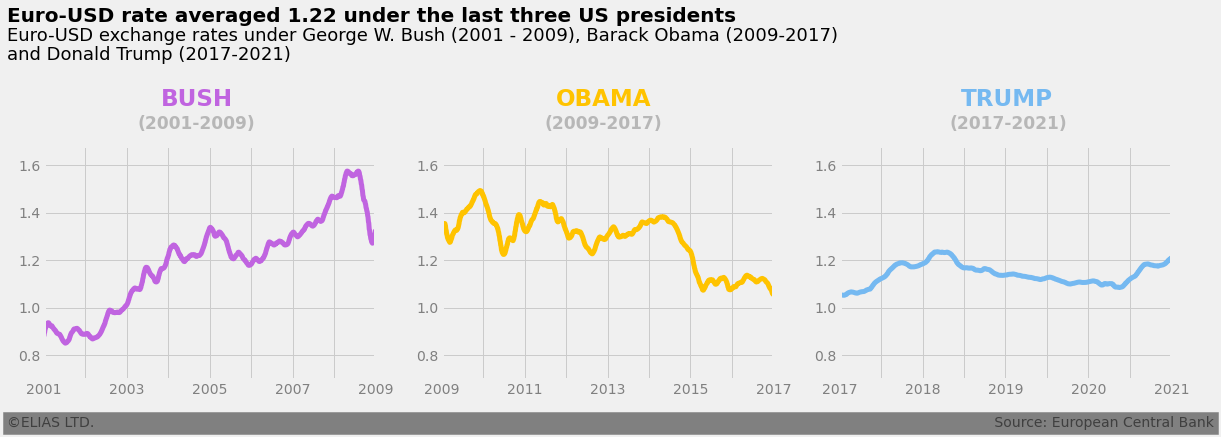

In [20]:
warnings.filterwarnings('ignore')

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,4))
plt.style.use('fivethirtyeight')

#AX1:
ax1.plot(exchange_rates['Time'], rolling_dollar, c='#C064E0', linewidth = 5)
ax1.set_xlim([datetime.date(2001,1,1), datetime.date(2009,1,1)])
ax1.set_ylim([0.7, 1.68])
ax1.set_xticklabels([2001, "", 2003, "", 2005, "", 2007, "", 2009])
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')
# AX2:
ax2.plot(exchange_rates['Time'], rolling_dollar, c = '#FFC300', linewidth = 5)
ax2.set_xlim([datetime.date(2009,1,1), datetime.date(2017,1,1)])
ax2.set_ylim([0.7, 1.68])
ax2.set_xticklabels([2009, "", 2011, "", 2013, "", 2015, "", 2017, ""])
ax2.tick_params(axis='x', colors='grey')
ax2.tick_params(axis='y', colors='grey')
#AX3
ax3.plot(exchange_rates['Time'], rolling_dollar, color = '#75B9F1', linewidth=5)
ax3.set_xlim([datetime.date(2017,1,1), datetime.date(2021,1,1)])
ax3.set_ylim([0.7,1.68])
ax3.set_xticklabels([2017, "", 2018, "", 2019, "", 2020, "", 2021])
ax3.tick_params(axis='x', colors='grey')
ax3.tick_params(axis='y', colors='grey')

ax1.text(11000,2.2,'Euro-USD rate averaged 1.22 under the last three US presidents', size=20, weight='bold')
ax1.text(11000,2.12, 'Euro-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017)', size=18)
ax1.text(11000,2.04, 'and Donald Trump (2017-2021)', size=18)
ax1.text(12350, 1.85, 'BUSH', size=23, weight='bold', color='#C064E0')
ax1.text(12150, 1.75, '(2001-2009)', size=17, color='grey', alpha=0.5, weight='bold')

ax2.text(15250, 1.85, 'OBAMA', size=23, weight='bold', color='#FFC300')
ax2.text(15150, 1.75, '(2009-2017)', size=17, color='grey', alpha=0.5, weight='bold')

ax3.text(17700, 1.85, 'TRUMP', size=23, weight='bold', color='#75B9F1')
ax3.text(17650, 1.75, '(2017-2021)', size=17, color='grey', weight='bold', alpha=0.5)

ax1.text(11000, 0.5, '©ELIAS LTD.' + " "*200 + "Source: European Central Bank", backgroundcolor='grey', alpha=0.5,
         size=14)
plt.show()

Due to We can clearly see that the peak occured during Bush's presidency in 2008-2009 and that the exchange rate slowly decreased overtime throughout the presidencies with a potential of an increase towards the end of 2021.